<a href="https://colab.research.google.com/github/DeHawk/TensorFlow/blob/master/Linear_Regression_Teras_Real_World_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%tensorflow_version 2.x

In [ ]:
# imports
import pandas as pd
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt

# adjust display options
pd.options.display.max_rows = 10
pd.options.display.float_format = "{:.1f}".format

In [ ]:
#import dataset

training_df = pd.read_csv(filepath_or_buffer="https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv")

#scale
training_df['median_house_value'] /= 1000

training_df.head(n=3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.3,34.2,15.0,5612.0,1283.0,1015.0,472.0,1.5,66.9
1,-114.5,34.4,19.0,7650.0,1901.0,1129.0,463.0,1.8,80.1
2,-114.6,33.7,17.0,720.0,174.0,333.0,117.0,1.7,85.7


In [ ]:
# stats on dataset

training_df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0
mean,-119.6,35.6,28.6,2643.7,539.4,1429.6,501.2,3.9,207.3
std,2.0,2.1,12.6,2179.9,421.5,1147.9,384.5,1.9,116.0
min,-124.3,32.5,1.0,2.0,1.0,3.0,1.0,0.5,15.0
25%,-121.8,33.9,18.0,1462.0,297.0,790.0,282.0,2.6,119.4
50%,-118.5,34.2,29.0,2127.0,434.0,1167.0,409.0,3.5,180.4
75%,-118.0,37.7,37.0,3151.2,648.2,1721.0,605.2,4.8,265.0
max,-114.3,42.0,52.0,37937.0,6445.0,35682.0,6082.0,15.0,500.0


In [ ]:
# build model

def build_model(my_learning_rate):

  model = tf.keras.models.Sequential()

  model.add(tf.keras.layers.Dense(units=1, input_shape = (1,)))

  model.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate=my_learning_rate),
                loss = "mean_squared_error",
                metrics = [tf.keras.metrics.RootMeanSquaredError()]
              )
  
  return model


In [12]:
# train model function

def train_model(model, df, feature, label, epochs, batch_size):

  history = model.fit(x=df[feature],
                      y=df[label],
                      batch_size = batch_size,
                      epochs=epochs
                      )
  
  trained_weight = model.get_weights()[0]
  trained_bias = model.get_weights()[1]

  #list of epochs is stored separately from history
  epochs = history.epoch

  #error for all epochs
  hist = pd.DataFrame(history.history)

  rmse = hist["root_mean_squared_error"]

  return trained_weight, trained_bias, epochs, rmse



In [14]:
# plot graphs

def plot_the_model(trained_weight, trained_bias, feature, label, training_df):

  plt.xlabel("feature")
  plt.ylabel("label")

  sample_df = training_df.sample(n=200)

  plt.scatter(sample_df[feature], sample_df[label])

  # draw trend line

  x0 = 0
  y0 = trained_bias

  x1 = 10000
  y1 = trained_bias + (trained_weight)*x1

  plt.plot([x0,y0],[x1,y1], c='r')

  plt.show()



def plot_the_loss_curve(epochs, rmse):

  plt.figure()

  plt.xlabel("epochs")
  plt.ylabel("root mean square error")

  plt.plot(epochs, rmse, label = "loss")
  plt.legend()

  plt.ylim([rmse.min()*0.97, rmse.max()])
  plt.show()




Epoch 1/25
1700/1700 [==============================] - 2s 912us/step - loss: 28389.6113 - root_mean_squared_error: 168.4922
Epoch 2/25
1700/1700 [==============================] - 2s 915us/step - loss: 26486.2676 - root_mean_squared_error: 162.7460
Epoch 3/25
1700/1700 [==============================] - 2s 910us/step - loss: 24689.5645 - root_mean_squared_error: 157.1291
Epoch 4/25
1700/1700 [==============================] - 2s 927us/step - loss: 23172.4375 - root_mean_squared_error: 152.2250
Epoch 5/25
1700/1700 [==============================] - 2s 938us/step - loss: 21818.6211 - root_mean_squared_error: 147.7113
Epoch 6/25
1700/1700 [==============================] - 2s 912us/step - loss: 20610.0195 - root_mean_squared_error: 143.5619
Epoch 7/25
1700/1700 [==============================] - 2s 1ms/step - loss: 19594.2754 - root_mean_squared_error: 139.9796
Epoch 8/25
1700/1700 [==============================] - 2s 932us/step - loss: 18526.9043 - root_mean_squared_error: 136.1136
Ep

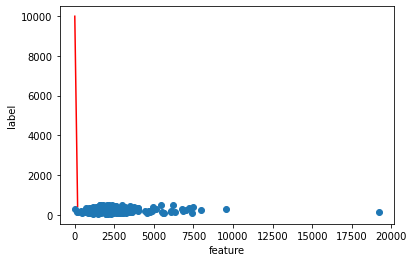

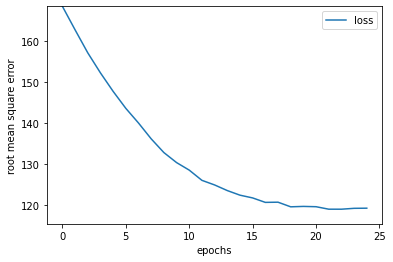

In [15]:
#hyper parameters
learning_rate = 0.01
epochs = 25
batch_size = 10

# feature and label columns
my_feature = "total_rooms"
my_label = "median_house_value"

# call model developin functions
my_model = build_model(learning_rate)

weight, bias, epochs, rmse = train_model(my_model, training_df, my_feature, my_label, epochs, batch_size )

#plot the curves

plot_the_model(weight, bias, my_feature, my_label, training_df)

plot_the_loss_curve(epochs, rmse)